In [2]:
import sys
import os
import numpy as np
import pandas as pd
sys.path.append(os.path.abspath(os.path.join('../')))
from scripts.loading_data import *
from scripts.visualize import *
from scripts.feature_engineering import *
import seaborn as sn



In [3]:
data = load_csv("../data/data.csv")

/home/dibora/Casualty/casuality/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  """Entry point for launching an IPython kernel.


In [6]:
data = data.drop(columns="Unnamed: 0")
data.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,area_se,radius_worst,perimeter_worst,area_worst,concave points_worst,diagnosis
0,17.99,122.80,1001.0,0.3001,0.14710,153.40,25.38,184.60,2019.0,0.2654,1
1,20.57,132.90,1326.0,0.0869,0.07017,74.08,24.99,158.80,1956.0,0.1860,1
2,19.69,130.00,1203.0,0.1974,0.12790,94.03,23.57,152.50,1709.0,0.2430,1
3,11.42,77.58,386.1,0.2414,0.10520,27.23,14.91,98.87,567.7,0.2575,1
4,20.29,135.10,1297.0,0.1980,0.10430,94.44,22.54,152.20,1575.0,0.1625,1


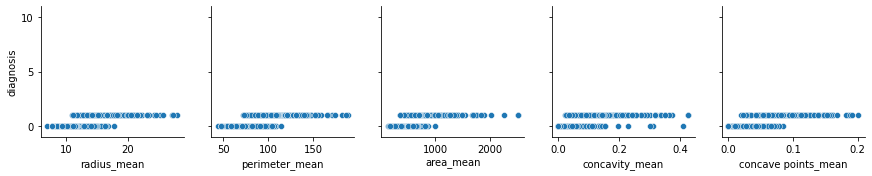

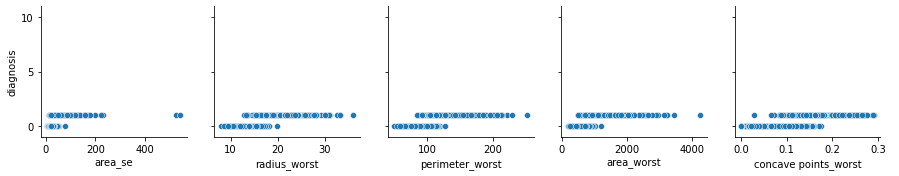

In [19]:
import seaborn as sn
g = sn.PairGrid(data, x_vars=["radius_mean","perimeter_mean","area_mean","concavity_mean","concave points_mean"], y_vars=["diagnosis"])
g1 = sn.PairGrid(data, x_vars=["area_se","radius_worst","perimeter_worst","area_worst","concave points_worst"], y_vars=["diagnosis"])
g.map(sn.scatterplot)
g1.map(sn.scatterplot)
g.set(ylim=(-1, 11), yticks=[0, 5, 10])
g1.set(ylim=(-1, 11), yticks=[0, 5, 10])
g1.add_legend("Feature distribution with respect to diagnosis")

### Handle Outliers

In [20]:
def outlier(df):
    column_name=df.columns.tolist()
    for i in column_name:
        upper_quartile=df[i].quantile(0.75)
        lower_quartile=df[i].quantile(0.25)
        df[i]=np.where(df[i]>upper_quartile,df[i].mean(),np.where(df[i]<lower_quartile,df[i].median(),df[i]))
    return df

In [21]:
outlier_handled = outlier(data)

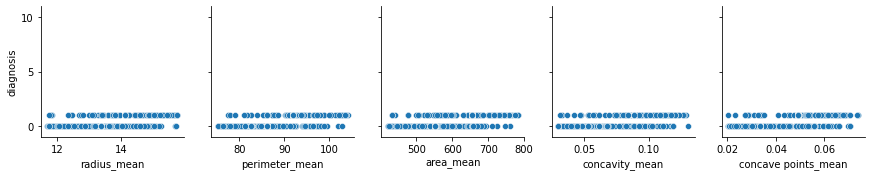

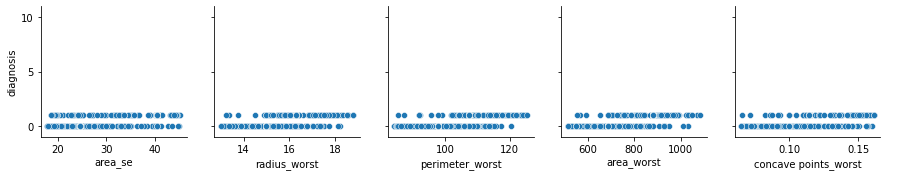

In [22]:
g = sn.PairGrid(outlier_handled, x_vars=["radius_mean","perimeter_mean","area_mean","concavity_mean","concave points_mean"], y_vars=["diagnosis"])
g1 = sn.PairGrid(outlier_handled, x_vars=["area_se","radius_worst","perimeter_worst","area_worst","concave points_worst"], y_vars=["diagnosis"])
g.map(sn.scatterplot)
g1.map(sn.scatterplot)
g.set(ylim=(-1, 11), yticks=[0, 5, 10])
g1.set(ylim=(-1, 11), yticks=[0, 5, 10])
g1.add_legend("Feature distribution with respect to diagnosis")

In [24]:
outlier_handled.to_csv('../data/data.csv')